# Mini-Projeto de análise de dados

### Informações sobre o projeto:
* Base de dados foi retirada do Kaggle: https://www.kaggle.com/code/hugovallejo/exportations-brazil-to-afghanistan-pyspark
* A base de dados completa contém as exportações para todos os países.Porém, selecionei apenas o país França e com exportações dos anos de 2016 à 2020;
* Fiz o download da base de dados e coloquei no meu google drive, para simular uma extração de dados da nuvem;  
        

### Puxar base de dados

In [1]:
# A informação foi retirada de uma base de dados filtrada de exportações, com exportações do Brasil para a França 
# Nos anos de 2016 a 2020
import pandas as pd

file_id = '1AACBthPcq9f9btki-bwIA3LuRso7d38e'
url = f'https://drive.google.com/uc?id={file_id}'

dados = pd.read_csv(url, sep = ',')
dados = dados.loc[dados['Economic Block'] == 'Europe', :]
display(dados)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22
...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400


### Informações Gerais

In [2]:
dados.info()

display(dados[['US$ FOB','Net Weight']].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71180 entries, 0 to 142358
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             71180 non-null  int64 
 1   Month            71180 non-null  int64 
 2   Country          71180 non-null  object
 3   City             71180 non-null  object
 4   SH4 Code         71180 non-null  int64 
 5   SH4 Description  71180 non-null  object
 6   SH2 Code         71180 non-null  int64 
 7   SH2 Description  71180 non-null  object
 8   Economic Block   71180 non-null  object
 9   US$ FOB          71180 non-null  int64 
 10  Net Weight       71180 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 6.5+ MB


,US$ FOB,Net Weight
count,7.118000e+04,7.118000e+04
mean,1.650039e+05,6.500505e+05
std,1.247209e+06,9.875945e+06
min,0.000000e+00,0.000000e+00
25%,4.170000e+02,3.000000e+00
50%,4.256500e+03,3.800000e+01
75%,3.710700e+04,3.185000e+03
max,1.086352e+08,7.100291e+08


### Como foi a evolução das exportações para a frança ao longo dos anos?

In [3]:
#Função de formatação em moeda
#Se quiser analisar por mês, basta inserir também no groupby a coluna mês;

exportacao_ano = dados[['US$ FOB', 'Net Weight' ]].groupby(dados['Year']).sum().round(2) 

exportacao_ano['US$ FOB'] = exportacao_ano['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
exportacao_ano['Net Weight'] = exportacao_ano['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')

display(exportacao_ano)

#exportacao_ano.corr()

,US$ FOB,Net Weight
Year,,
2016,"$2,307,750,041.00","10,899,058,259"
2017,"$2,224,352,728.00","11,278,264,626"
2018,"$2,619,712,208.00","10,452,620,066"
2019,"$2,609,361,806.00","8,206,207,675"
2020,"$1,983,797,405.00","5,434,444,024"


### Quais os produtos mais exportados (US$) ao longo de todo o período?

In [20]:
exportacao_produtos = dados.groupby(['SH4 Description']).sum()
exportacao_produtos = exportacao_produtos[['Net Weight','US$ FOB']]
top10_produtos = exportacao_produtos.sort_values(by = 'US$ FOB', ascending = False ).head(10)

top10_produtos['US$ FOB'] = top10_produtos['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
top10_produtos['Net Weight'] = top10_produtos['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')

display(top10_produtos)

,Net Weight,US$ FOB
SH4 Description,,
"Soybean oilcake and other solid residue, wh/not ground","8,338,360,155","$2,814,212,320.00"
"Iron ores and concentrates, including roasted iron pyrites","31,171,398,902","$1,632,140,244.00"
"Chemical wood pulp, soda or sulphate, other than dissolving grades","1,929,050,213","$922,712,342.00"
"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion","230,105,337","$536,277,376.00"
"Other aircraft (for example, helicopters, aeroplanes); spacecraft (including satellites) and suborbital and spacecraft launch vehicles","385,660","$342,566,535.00"
"Soya beans, whether or not broken","802,713,083","$300,445,076.00"
Parts of goods of headings 8801 or 8802,"329,021","$283,548,615.00"
Crude oil from petroleum and bituminous minerals,"792,997,500","$246,100,922.00"
"Petroleum oils and oils obtained from bituminous minerals, other than crude; preparations not elsewhere specified or included, containing by weight 70 % or more of petroleum oils or of oils obtained from bituminous minerals, these oils being the basic con","387,999,306","$245,979,739.00"


### Em 2020, qual cidade mais exportou (US$) para a França?

In [75]:
dados2020 = dados[dados['Year'] == 2020]
exportacao_cidade = dados2020.groupby(['City']).sum()[['US$ FOB','Net Weight']]

exportacao_cidade = exportacao_cidade.sort_values(by = 'US$ FOB', ascending = False )
exportacao_cidade['US$ FOB'] = exportacao_cidade['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
exportacao_cidade['Net Weight'] = exportacao_cidade['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')

display(exportacao_cidade.head(5))

,US$ FOB,Net Weight
City,,
Duque de Caxias - RJ,"$139,702,798.00","126,387,980"
Luís Eduardo Magalhães - BA,"$132,664,066.00","413,232,986"
Ponta Grossa - PR,"$93,888,508.00","284,331,041"
São José dos Campos - SP,"$86,469,638.00","126,927"
Rio de Janeiro - RJ,"$61,261,107.00","151,607,763"


### No ano de 2020, o que as 2 maiores cidades exportaram tanto (US$)?

In [85]:
#Duque de caxias - RJ 
cidade1 = exportacao_cidade.index[0]
dados_ddcaxias = dados2020[dados2020['City'] == cidade1]
dados_ddcaxias = dados_ddcaxias.groupby(['SH4 Description']).sum()[['US$ FOB','Net Weight']].sort_values('US$ FOB', ascending = False)

dados_ddcaxias['US$ FOB'] = dados_ddcaxias['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
dados_ddcaxias['Net Weight'] = dados_ddcaxias['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')
display(dados_ddcaxias)


#Luís Eduardo Magalhães - BA
cidade2 = exportacao_cidade.index[1]
dados_lem_BA = dados2020[dados2020['City'] == cidade2]
dados_lem_BA= dados_lem_BA.groupby(['SH4 Description']).sum()[['US$ FOB','Net Weight']].sort_values('US$ FOB', ascending = False)

dados_lem_BA['US$ FOB'] = dados_lem_BA['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
dados_lem_BA['Net Weight'] = dados_lem_BA['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')
display(dados_lem_BA)

,US$ FOB,Net Weight
SH4 Description,,
"Turbo-jets, turbo-propellers and other gas turbines","$82,490,516.00","8,164"
Crude oil from petroleum and bituminous minerals,"$33,610,511.00","119,402,538"
"Transmission shafts (including cam shafts and crank shafts) and cranks; bearing housings and plain shaft bearings; gears and gearing; ball or roller screws; gear boxes and other speed changers, including torque converters; flywheels and pulleys, including","$4,897,696.00","1,170"
Ball or roller bearings,"$4,123,545.00",110
"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter-pins, washers (including spring washers) and similar articles, of iron or steel","$2,109,423.00",146
"Soybean oilcake and other solid residue, wh/not ground","$2,007,137.00","6,339,523"
Other articles of nickel,"$1,475,623.00",18
Other articles of iron or steel,"$1,423,564.00",207
"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves","$1,028,261.00",168


,US$ FOB,Net Weight
SH4 Description,,
"Soybean oilcake and other solid residue, wh/not ground","$132,649,904.00","413,221,402"
"Melons (including watermelons) and papaws (papayas), fresh","$14,162.00","11,584"


### Análises extras:

In [5]:
# Adicionando a informação de UF(unidades federativas, vulgo estados) a tabela;
def selecionar_estado(texto):
    return texto[-2:]


dados['State'] = dados['City'].apply(selecionar_estado)
dados

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight,State
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150,SC
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385,SC
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600,MG
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306,MT
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22,PA
...,...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0,SP
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50,SP
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4,SP
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400,PE


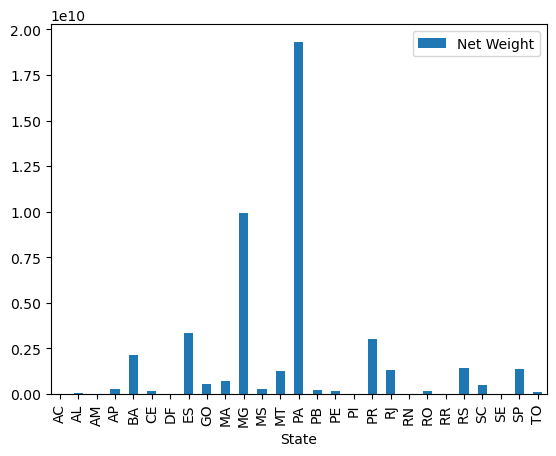

In [6]:
dados[['Net Weight']].groupby(dados['State']).sum().round(2).plot(kind = 'bar');

In [92]:
#evolução das exportações para a frança por estado ao longo do período;
exportacao_ano_state = dados.groupby(['State']).sum()[['US$ FOB','Net Weight']].sort_values('US$ FOB', ascending = False)

exportacao_ano_state['US$ FOB'] = exportacao_ano_state['US$ FOB'].apply(lambda valor: f'${valor:,.2f}')
exportacao_ano_state['Net Weight'] = exportacao_ano_state['Net Weight'].apply(lambda valor1: f'{valor1:,.0f}')

exportacao_ano_state[:5]

,US$ FOB,Net Weight
State,,
SP,"$2,689,500,755.00","1,347,852,557"
PR,"$1,374,837,315.00","3,019,797,228"
MG,"$1,362,864,647.00","9,915,222,402"
PA,"$1,204,571,569.00","19,311,026,613"
BA,"$856,701,483.00","2,141,496,701"


In [8]:
from collections import Counter

meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
amount = []

for i, valor in enumerate(range(12)):
    dados_jan_2016 = dados[(dados['Year'] == 2016) & (dados['Month'] == i+1)]
    amount.append(dados_jan_2016['US$ FOB'].sum())
    
amount_mes = dict(zip(meses, amount))

aux = Counter(amount_mes) 

dict(aux.most_common(len(amount_mes)))

{'ago': 262522424,
 'set': 236601182,
 'jun': 223229869,
 'mai': 215524617,
 'abr': 197798559,
 'jul': 197301365,
 'mar': 193429636,
 'dez': 180391569,
 'nov': 176869627,
 'jan': 176123570,
 'out': 138268657,
 'fev': 109688966}